# Melbourne Price Prediction 


## Importing all the required libraries

In [120]:
#writing all the import statement over here
import numpy as np
import pandas as pd
import os 

import matplotlib as mpl
import matplotlib.pyplot as plt


from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [59]:
#importing dataset.csv to dataframe
df = pd.read_csv('melb_data.csv', index_col=False)

In [184]:
#checking the first five rows of the data
df.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [61]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

# Data Cleaning and Pre-processing

In [188]:
df.nunique(axis=0)

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [206]:
#data Cleaning
df1=df.dropna(axis=0)


In [195]:
df1.describe()


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,8887.000000,8.887000e+03,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000
mean,3.098909,1.092902e+06,11.199887,3111.662653,3.078204,1.646450,1.692247,523.480365,149.309477,1965.753348,-37.804501,144.991393,7475.940137
std,0.963786,6.793819e+05,6.813402,112.614268,0.966269,0.721611,0.975464,1061.324228,87.925580,37.040876,0.090549,0.118919,4375.024364
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.174360,144.423790,249.000000
25%,2.000000,6.410000e+05,6.400000,3044.000000,2.000000,1.000000,1.000000,212.000000,100.000000,1945.000000,-37.858560,144.920000,4382.500000
50%,3.000000,9.000000e+05,10.200000,3084.000000,3.000000,2.000000,2.000000,478.000000,132.000000,1970.000000,-37.798700,144.998500,6567.000000
75%,4.000000,1.345000e+06,13.900000,3150.000000,4.000000,2.000000,2.000000,652.000000,180.000000,2000.000000,-37.748945,145.064560,10331.000000
max,12.000000,9.000000e+06,47.400000,3977.000000,12.000000,9.000000,10.000000,42800.000000,3112.000000,2019.000000,-37.407200,145.526350,21650.000000


In [65]:
df1 = df1.drop(["Distance","Propertycount"], axis =1)

In [66]:
df1.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan


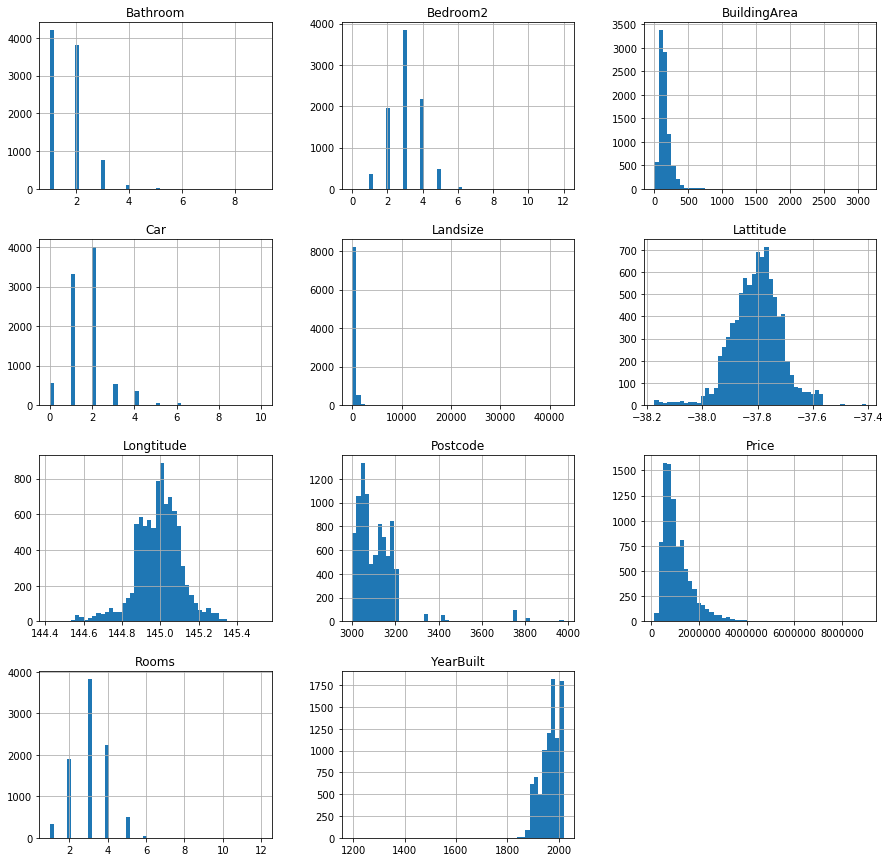

In [67]:
%matplotlib inline

df1.hist(bins=50, figsize=(15, 15))
plt.show()

In [198]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df
    df = df.dropna('columns') 
    df = df[[col for col in df if df[col].nunique() > 1]] 
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

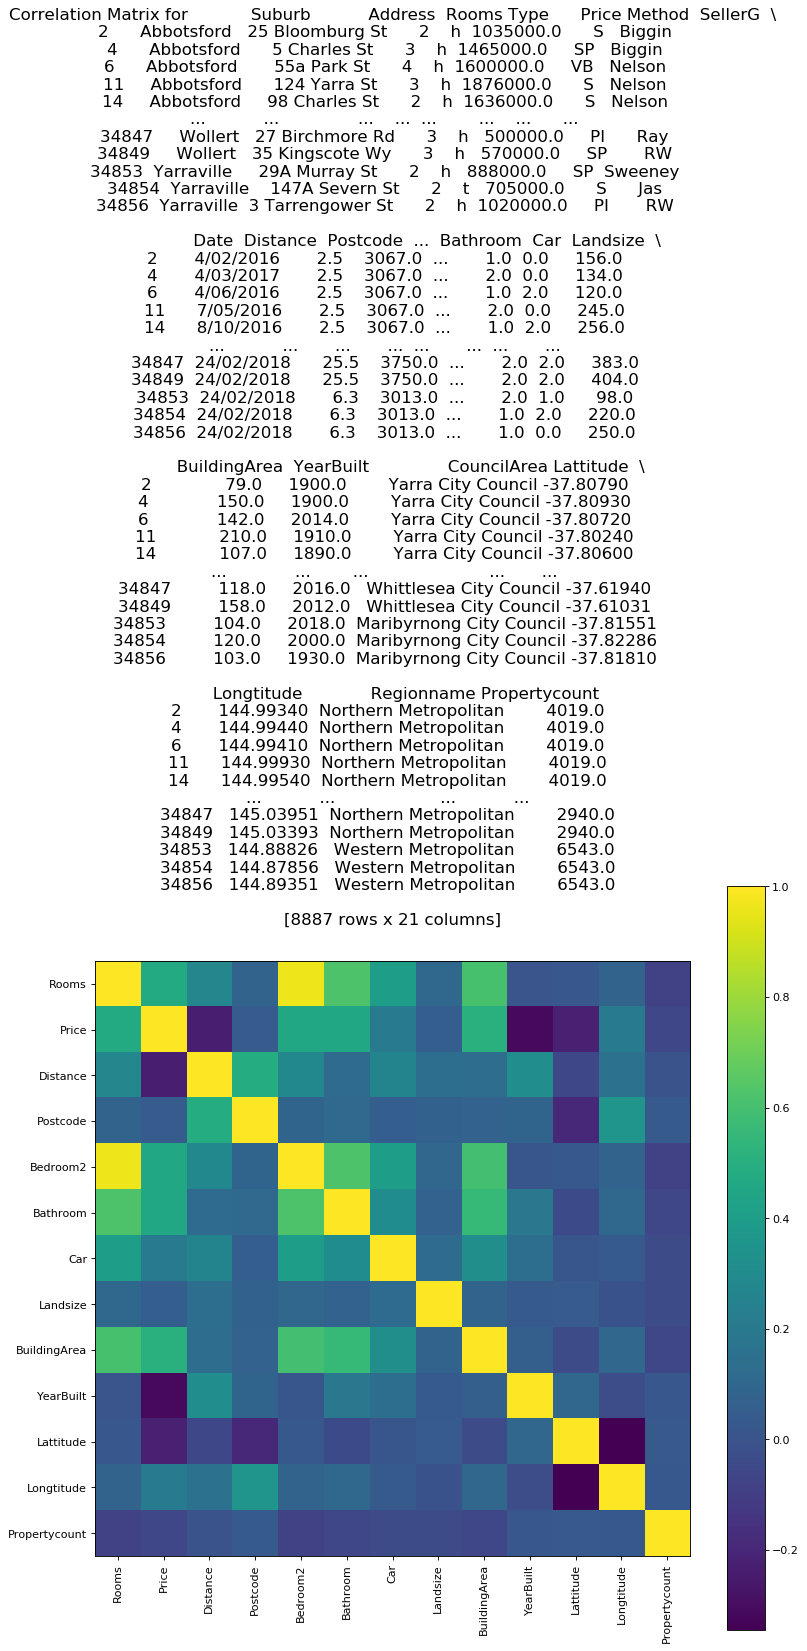

In [199]:
plotCorrelationMatrix(df1, 12)

In [72]:
y=df1["Price"]

In [73]:
melbourne_features=['Rooms','Bathroom','Landsize','Lattitude','Longtitude','Car','BuildingArea','YearBuilt']

In [74]:
X=df1[melbourne_features]



In [200]:
X.describe()



,Rooms,Bathroom,Landsize,Lattitude,Longtitude,Car,BuildingArea,YearBuilt
count,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000
mean,3.098909,1.646450,523.480365,-37.804501,144.991393,1.692247,149.309477,1965.753348
std,0.963786,0.721611,1061.324228,0.090549,0.118919,0.975464,87.925580,37.040876
min,1.000000,1.000000,0.000000,-38.174360,144.423790,0.000000,0.000000,1196.000000
25%,2.000000,1.000000,212.000000,-37.858560,144.920000,1.000000,100.000000,1945.000000
50%,3.000000,2.000000,478.000000,-37.798700,144.998500,2.000000,132.000000,1970.000000
75%,4.000000,2.000000,652.000000,-37.748945,145.064560,2.000000,180.000000,2000.000000
max,12.000000,9.000000,42800.000000,-37.407200,145.526350,10.000000,3112.000000,2019.000000


In [202]:
X.count()

Rooms           8887
Bathroom        8887
Landsize        8887
Lattitude       8887
Longtitude      8887
Car             8887
BuildingArea    8887
YearBuilt       8887
dtype: int64

In [76]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude,Car,BuildingArea,YearBuilt
2,2,1.0,156.0,-37.8079,144.9934,0.0,79.0,1900.0
4,3,2.0,134.0,-37.8093,144.9944,0.0,150.0,1900.0
6,4,1.0,120.0,-37.8072,144.9941,2.0,142.0,2014.0
11,3,2.0,245.0,-37.8024,144.9993,0.0,210.0,1910.0
14,2,1.0,256.0,-37.8060,144.9954,2.0,107.0,1890.0


In [77]:
X.tail()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude,Car,BuildingArea,YearBuilt
34847,3,2.0,383.0,-37.61940,145.03951,2.0,118.0,2016.0
34849,3,2.0,404.0,-37.61031,145.03393,2.0,158.0,2012.0
34853,2,2.0,98.0,-37.81551,144.88826,1.0,104.0,2018.0
34854,2,1.0,220.0,-37.82286,144.87856,2.0,120.0,2000.0
34856,2,1.0,250.0,-37.81810,144.89351,0.0,103.0,1930.0


In [115]:
# X.to_csv('MelSQLiteData.csv', index=False)

In [80]:
melbourne_model=DecisionTreeRegressor(random_state=1)
melbourne_model.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [92]:
print("Making predictions for 5 Properties:")
print(X.head())
print("The predicted values are:")
print(melbourne_model.predict(X.head()))

Making predictions for 5 Properties:
    Rooms  Bathroom  Landsize  Lattitude  Longtitude  Car  BuildingArea  \
2       2       1.0     156.0   -37.8079    144.9934  0.0          79.0   
4       3       2.0     134.0   -37.8093    144.9944  0.0         150.0   
6       4       1.0     120.0   -37.8072    144.9941  2.0         142.0   
11      3       2.0     245.0   -37.8024    144.9993  0.0         210.0   
14      2       1.0     256.0   -37.8060    144.9954  2.0         107.0   

    YearBuilt  
2      1900.0  
4      1900.0  
6      2014.0  
11     1910.0  
14     1890.0  
The predicted values are:
[1035000. 1465000. 1600000. 1876000. 1636000.]


In [83]:
# MAE

predict_price=melbourne_model.predict(X)
mean_absolute_error(y,predict_price)

325.13784179138065

In [203]:
#decision tree



train_X,val_X,train_y,val_y = train_test_split(X,y,random_state=0,test_size=0.2)

melbourne_model=DecisionTreeRegressor()

melbourne_model.fit(train_X,train_y)

val_predictions=melbourne_model.predict(val_X)

print('Mean Abolute error is :' , mean_absolute_error(val_y, val_predictions))

score=melbourne_model.score(val_X,val_y)

print('The Accuracy for the decision tree model is :',score)



#Calculating the RMSE Value 
rmse = mean_squared_error(val_y, val_predictions, squared=False)
print('The Root Mean Square Error score is :', rmse)


#Calculating the MSE Value
MSE = mean_squared_error(val_y, val_predictions, squared=True)
print('The Mean Square Error score is :', MSE)




Mean Abolute error is : 244777.5286839145
The Accuracy for the decision tree model is : 0.5850282431260069
The Root Mean Square Error score is : 452419.5642424302
The Mean Square Error score is : 204683462109.31046


In [204]:
#Random Forest Algorithm

melbourne_model=RandomForestRegressor()

melbourne_model.fit(train_X,train_y)

val_predictions=melbourne_model.predict(val_X)

print('Mean Absolute error is :' , mean_absolute_error(val_y, val_predictions))

score=melbourne_model.score(val_X,val_y)

print('The Accuracy for the Random Forest model is : ',score)


#Calculating the RMSE Value 
rmse = mean_squared_error(val_y, val_predictions, squared=False)
print('The Root Mean Square Error score is :', rmse)


#Calculating the MSE Value
MSE = mean_squared_error(val_y, val_predictions, squared=True)
print('The Mean Square Error score is :', MSE)




Mean Absolute error is : 170255.4027917939
The Accuracy for the Random Forest model is :  0.7970134717823905
The Root Mean Square Error score is : 316421.30344200693
The Mean Square Error score is : 100122441271.93864


In [205]:
#Linear regression

melbourne_model=LinearRegression()

melbourne_model.fit(train_X,train_y)

val_predictions=melbourne_model.predict(val_X)

print('Mean absolute error is :', mean_absolute_error(val_y, val_predictions))

score=melbourne_model.score(val_X,val_y)

print('The Accuracy for Linear Regression model is :',score)


#RMSE Value calculate over here 
rmse = mean_squared_error(val_y, val_predictions, squared=False)
print('The Root Mean Square Error score is :', rmse)

#Calculating the MSE Value
MSE = mean_squared_error(val_y, val_predictions, squared=True)
print('The Mean Square Error score is :', MSE)



Mean absolute error is : 311146.92175722943
The Accuracy for Linear Regression model is : 0.4390340742587351
The Root Mean Square Error score is : 526017.6883891266
The Mean Square Error score is : 276694608498.24023


In [170]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [171]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# it will search around 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_X, train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 10.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [172]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [167]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [176]:
from sklearn.ensemble import RandomForestRegressor
rt_model=RandomForestRegressor(n_estimators=100,random_state=0)
rt_model.fit(train_X,train_y)
random_forest_accuracy=evaluate(rt_model,val_X,val_y)

Model Performance
Average Error: 168897.0435 degrees.
Accuracy = 85.05%.


In [177]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, val_X, val_y)

basemodel_accuracy=evaluate(rt_model,val_X,val_y)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - basemodel_accuracy) / basemodel_accuracy))

Model Performance
Average Error: 168920.1800 degrees.
Accuracy = 85.11%.
Model Performance
Average Error: 168897.0435 degrees.
Accuracy = 85.05%.
Improvement of 0.06%.


In [ ]:
import joblib
from joblib import dump,load
dump(rf_random,'housepriceprediction.joblib')